# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import OpenWeather API key
my_api_code_source = open('/Users/Richa/Desktop/weather_api_key.py') 
openweather_api_key = my_api_code_source.read()

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Import todays date in mm/dd/yyyy format
today = date.today()
today = today.strftime("%m/%d/%Y")

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
#create url starter
url = "http://api.openweathermap.org/data/2.5/weather?q="

#define variables
city_list_data = []
city_name = []
units = "imperial"
lat = []
long = []
max_temp = []
humid = []
clouds = []
wind_speed = []
country = []
date = []
count = 0
record = 0
set_number = 1
error = 0


for city in cities:
    city_data = requests.get(f"{url}{city}&units={units}&appid={openweather_api_key}").json()
    try:
        city_list_data.append(city_data)
        
        # Perform ground work for df while processing records
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        count += 1
        # Create if statement to keep track and add delay
        if record >= 50:
            record = 1
            set_number += 1
            time.sleep(1)
        else:
            record += 1
        
        #Print processing status
        print(f'Processing Record {record} of Set {set_number} | {city}')

    # If Key Error skip over it but add one to error count
    except KeyError:
        pass
        error +=1

#Keep data clean and add end statement with counts found
print("-------------------")
print("Processing complete")
print(f"Successfully processed {count} cities")
print(f"Faied to process {error} cities")

Processing Record 1 of Set 1 | ulaanbaatar
Processing Record 2 of Set 1 | acapulco
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | sovetskiy
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | japura
Processing Record 11 of Set 1 | urusha
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | port hardy
Processing Record 15 of Set 1 | berlevag
Processing Record 16 of Set 1 | pangody
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | tena
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | vila franca do campo
Processing Record 22 of Set 1 | kaitangata
Processing Record 23 of Set 1 | nyurba
Processing Record 24 of Set 1 | dingle
Processing Re

Processing Record 1 of Set 5 | fengrun
Processing Record 2 of Set 5 | humaita
Processing Record 3 of Set 5 | baoqing
Processing Record 4 of Set 5 | baculin
Processing Record 5 of Set 5 | kununurra
Processing Record 6 of Set 5 | ukiah
Processing Record 7 of Set 5 | yatou
Processing Record 8 of Set 5 | espanola
Processing Record 9 of Set 5 | lavrentiya
Processing Record 10 of Set 5 | hutang
Processing Record 11 of Set 5 | cidreira
Processing Record 12 of Set 5 | shubarshi
Processing Record 13 of Set 5 | lavumisa
Processing Record 14 of Set 5 | kavieng
Processing Record 15 of Set 5 | port hedland
Processing Record 16 of Set 5 | pisco
Processing Record 17 of Set 5 | touros
Processing Record 18 of Set 5 | praia da vitoria
Processing Record 19 of Set 5 | arlit
Processing Record 20 of Set 5 | vysokogornyy
Processing Record 21 of Set 5 | tiksi
Processing Record 22 of Set 5 | jalu
Processing Record 23 of Set 5 | geraldton
Processing Record 24 of Set 5 | port macquarie
Processing Record 25 of Se

Processing Record 1 of Set 9 | dubreka
Processing Record 2 of Set 9 | opotiki
Processing Record 3 of Set 9 | aosta
Processing Record 4 of Set 9 | erzin
Processing Record 5 of Set 9 | waingapu
Processing Record 6 of Set 9 | quang ngai
Processing Record 7 of Set 9 | moranbah
Processing Record 8 of Set 9 | porbandar
Processing Record 9 of Set 9 | poum
Processing Record 10 of Set 9 | staryy nadym
Processing Record 11 of Set 9 | salina
Processing Record 12 of Set 9 | arroio grande
Processing Record 13 of Set 9 | abancay
Processing Record 14 of Set 9 | adrar
Processing Record 15 of Set 9 | bambanglipuro
Processing Record 16 of Set 9 | cairns
Processing Record 17 of Set 9 | qaqortoq
Processing Record 18 of Set 9 | corinto
Processing Record 19 of Set 9 | comodoro rivadavia
Processing Record 20 of Set 9 | taoudenni
Processing Record 21 of Set 9 | nikolsk
Processing Record 22 of Set 9 | erdenet
Processing Record 23 of Set 9 | ribas do rio pardo
Processing Record 24 of Set 9 | gambela
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Add lists into dictionary
city_weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date 
}

#Create df from dictionary
city_weather_df = pd.DataFrame(city_weather_dict)

#Export the city data into a .csv from variable defined above
city_weather_df.to_csv(output_data_file , index=False, header=True)

#Display df
city_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ulaanbaatar,47.91,106.88,-22.00,74,0,4.47,MN,1608415554
1,Acapulco de Juárez,16.86,-99.89,84.20,74,75,5.82,MX,1608415761
2,Dikson,73.51,80.55,-16.15,90,100,4.83,RU,1608415784
3,Fortuna,40.60,-124.16,61.00,76,75,3.36,US,1608415785
4,Bredasdorp,-34.53,20.04,60.80,87,0,2.24,ZA,1608415785


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.605475,18.152359,50.851215,75.061620,51.330986,8.468169,1.608416e+09
std,33.596972,93.448687,30.926936,18.567045,38.964955,6.541955,6.999876e+01
min,-54.800000,-179.170000,-42.750000,19.000000,0.000000,0.040000,1.608415e+09
25%,-9.095000,-64.207500,32.000000,67.000000,7.000000,3.360000,1.608416e+09
50%,22.550000,20.805000,60.800000,78.000000,48.000000,6.640000,1.608416e+09
75%,47.430000,108.207500,76.397500,89.000000,90.000000,11.410000,1.608416e+09
max,78.220000,179.320000,99.340000,100.000000,100.000000,41.610000,1.608416e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.

#too_humid = city_weather_df[ city_weather_df['Humidity'] > 100].index
#print(too_humid)

Int64Index([], dtype='int64')


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_weather_df, which we call "clean_city_df".

#clean_city_df = city_weather_df.drop(too_humid)
#clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

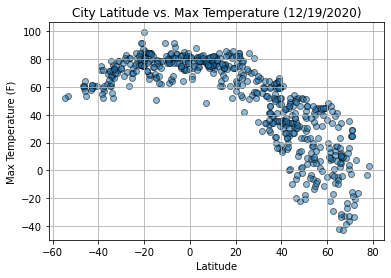

In [11]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Max Temp']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()City Latitude vs. Max Temperature

plt.savefig("output_data/LatitudeVsTemperaturePlot.png")

plt.show()


For the City Latitude vs. Humidity plot, the lower latitudes of this time frame are much warmer than the upper latitudes. It seems that -20 to 20 is the warmest range and the temperature may also drop more after -40 but we do not have data on those cities.

## Latitude vs. Humidity Plot

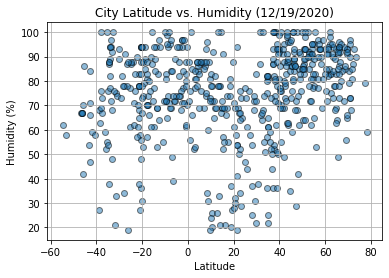

In [12]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Humidity']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig("output_data/LatitudeVsHumidityPlot.png")

plt.show()

For the City Latitude vs. Humidity plot, there is a wide spread of the points which shows little correlation between latitude and humidity. There are slighty more dry cities closer to the equator (0 Latitude).

## Latitude vs. Cloudiness Plot

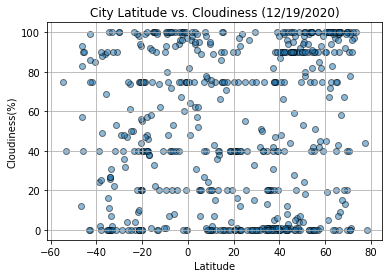

In [13]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Cloudiness']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

plt.savefig("output_data/LatitudeVsCloudinessPlot.png")

plt.show()

For the City Latitude vs. Cloudiness plot there is a very even distribution. From 0 to 100 % clouds happen at all latitudes tested.

## Latitude vs. Wind Speed Plot

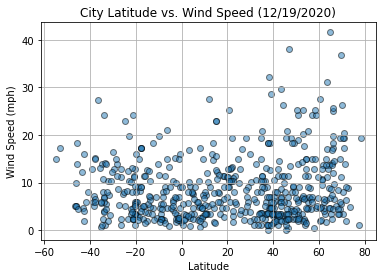

In [14]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Wind Speed']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig("output_data/LatitudeVsWindSpeedPlot.png")

plt.show()City Latitude vs. Wind Speed

For the City Latitude vs. Cloudiness plot there is slight more windy cities at higher latitude. Even at lower latitudes there is more cloud coverage than the equator, but still the majority are less than 20mph overall latitudes tested.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


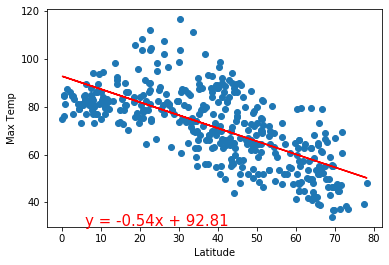

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


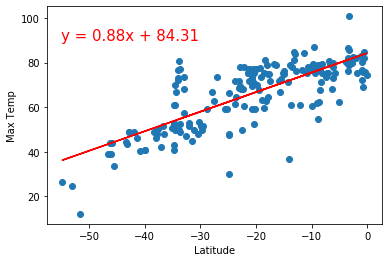

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


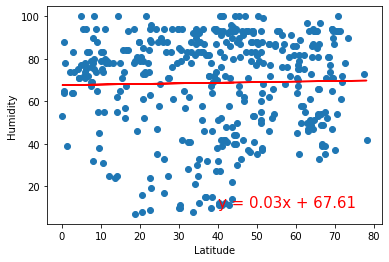

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


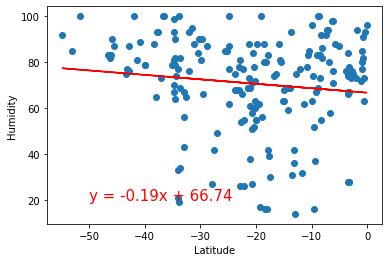

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


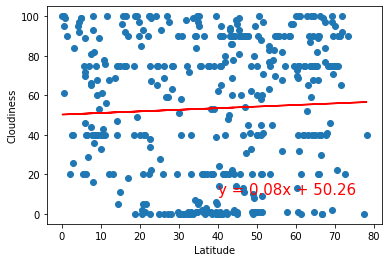

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


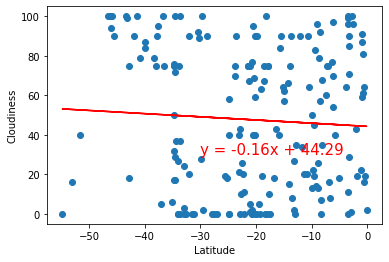

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


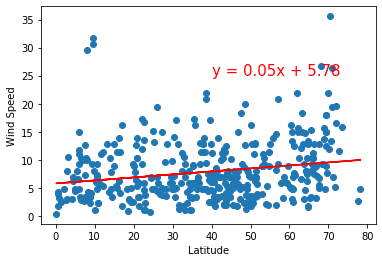

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


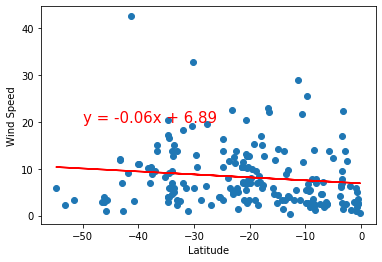